In [38]:
using Plots
using DataFrames
using JSON3
using JSONTables
using Statistics
using HypothesisTests
using Distributions

In [10]:
#using just the first file to try out some plots
df = DataFrame()
json_files = readdir("../data/")
selected_vars = [:classification, :description, :articles_count, :authors, :dependencies, :homepage,
:id, :keywords, :license_terms, :name, :operating_systems, :orms_id,:programming_languages,
:related_software, :source_code, :standard_articles, :zbmath_url]

for file in json_files
    if file == "full_df.csv"
        continue
    end
    json_file = JSON3.read(string("../data/", file))
    for k in keys(json_file)
        temp_dict = copy(json_file[k])
        for var in selected_vars
            if temp_dict[var] == nothing
                temp_dict[var] = string()
            end
            if temp_dict[var] isa Array
                temp_dict[var] = join(temp_dict[var], ";")
            end
        end
        result = Dict{Symbol, Any}()

        for (k,v) in temp_dict
            if k in selected_vars
                push!(result, k=>v)
            end
        end
        temp_df = result |> DataFrame;
        append!(df,temp_df)
    end
end

In [54]:
#some descriptive statistcs
mean_articles_count = mean(df.articles_count)
std_articles_count = std(df.articles_count)
median_articles_count = median(df.articles_count)
min_articles_count = minimum(df.articles_count)
max_articles_count = maximum(df.articles_count)

println("Mean: $mean_articles_count")
println("Standard Deviation: $std_articles_count")
println("Median: $median_articles_count")
println("Min: $min_articles_count")
println("Max: $max_articles_count")

UndefVarError: UndefVarError: `modus` not defined

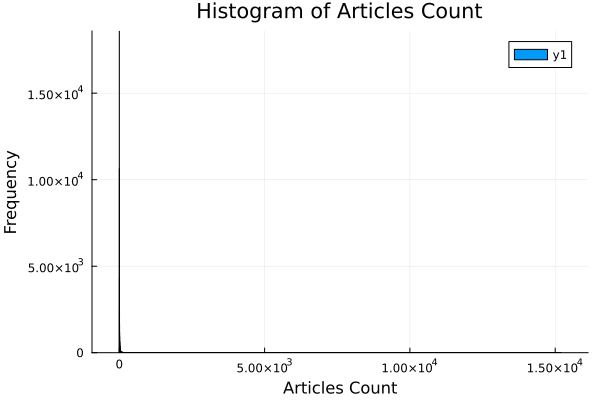

In [14]:
histogram(df.articles_count, title="Histogram of Articles Count", xlabel="Articles Count", ylabel="Frequency", bins=10000)

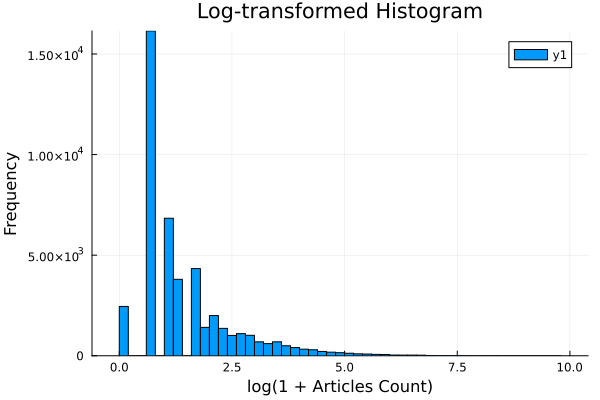

In [18]:
# very sensitve to outliers, so I will try a log plot.
log_articles_count = log1p.(df.articles_count)
histogram(log_articles_count, bins=50, title="Log-transformed Histogram", xlabel="log(1 + Articles Count)", ylabel="Frequency")

In [25]:
printnames(HypothesisTests)

58-element Vector{Symbol}:
 :ADFTest
 :ApproximateMannWhitneyUTest
 :ApproximateOneSampleKSTest
 :ApproximatePermutationTest
 :ApproximateSignedRankTest
 :ApproximateTwoSampleKSTest
 :BartlettTest
 :BinomialTest
 :BoxPierceTest
 :BreuschGodfreyTest
 ⋮
 :UnequalVarianceZTest
 :VarianceFTest
 :WaldWolfowitzTest
 :WhiteTest
 :confint
 :dof
 :nobs
 :pvalue
 :testname

In [53]:
n = length(df.articles_count)
x = 0.5 .^ (1:n)
d = Normal(14.442, 131.4)
display(ExactOneSampleKSTest(df.articles_count, d))

Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.456241

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-99

Details:
    number of observations:   46210


┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests C:\Users\49157\.julia\packages\HypothesisTests\r322N\src\kolmogorov_smirnov.jl:68


I assume we can reject the assumption that articles_count is normally distributed. I am not sure if i used the 
function right, but it's also visible in the plot. 